In [2]:
import simexpal
import pandas as pd
import yaml
import numpy as np
from matplotlib import pyplot as plt
import networkit as nk

In [149]:
def parse(run, f):
    output = yaml.load(f, Loader=yaml.Loader)
    exp = output['Runs'][0]
    if 'Results' in exp:
        res = []
        # exp['Result'] = [{Focus Node, Value, Gain, Time, Original Value, AddedEdgeList},...]
        for result in exp['Results']:
            single_res = {
                'Experiment': run.experiment.name + 'JLT' if 'Linalg' in exp and 'JLT' in exp['Linalg'] else run.experiment.name,
                'Instance': run.instance.shortname,
                'Revision': run.experiment.revision.name,
                # 'Nodes': exp['Nodes'],
                # 'Edges': exp['Edges'],
                'k': exp['k'],
                # 'Threads': exp['Threads'],
                # 'All-Columns': exp['All-Columns'],
                # 'Heuristic': exp['Heuristic'] if 'Heuristic' in exp else None,
                # 'Accuracy_trees': exp['Epsilon2'] if 'Epsilon2' in exp else None,
                # 'Epsilon': exp['Epsilon'] if 'Epsilon' in exp else None,
                # 'SolverEpsilon': exp['SolverEpsilon'] if 'SolverEpsilon' in exp else None,
                'Linalg': exp['Linalg'] if 'Linalg' in exp else None,
                # 'Candidate size': exp['Candidate size'] if 'Candidate size' in exp else None,
                # 'similarityIterations': exp['similarityIterations'] if 'similarityIterations' in exp else None,
                'Algorithm': exp['Algorithm'],
                'InitTime': exp['InitTime'] if 'InitTime' in exp else None,
                'Focus Node': result['Focus Node'] if 'Focus Node' in result else None,
                # 'Value': result['Value'],
                # 'Original Value': result['Original Value'],
                'Gain': result['Gain'],
                'Time': result['Time'],
                # 'Spectral Value': result['Spectral Value'] if 'Spectral Value' in result else None,
                # 'Spectral Original Value': result['Spectral Original Value'] if 'Spectral Original Value' in result else None,
                # 'Spectral Gain': result['Spectral Gain'] if 'Spectral Gain' in result else None,
                # 'Eigenpairs': result['Eigenpairs'] if 'Eigenpairs' in result else None,
                # 'Max Eigenvalue': result['Max Eigenvalue'] if 'Max Eigenvalue' in result else None,
                # 'Diff2': result['Diff2'] if 'Diff2' in result else None,
                # 'UpdatePerRound': result['UpdatePerRound'] if 'UpdatePerRound' in result else None,
                # 'ne': result['ne'] if 'ne' in result else None,
            }
            res.append(single_res)
    else:
        res = {
            'Experiment': run.experiment.name,
            'Instance': run.instance.shortname,
            'Revision': run.experiment.revision.name,
            # 'Nodes': exp['Nodes'],
            # 'Edges': exp['Edges'],
            'k': exp['k'],
            # 'Threads': exp['Threads'],
            # 'All-Columns': exp['All-Columns'],
            # 'Heuristic': exp['Heuristic'] if 'Heuristic' in exp else None,
            # 'Accuracy_trees': exp['Epsilon2'] if 'Epsilon2' in exp else None,
            # 'Epsilon': exp['Epsilon'] if 'Epsilon' in exp else None,
            # 'SolverEpsilon': exp['SolverEpsilon'] if 'SolverEpsilon' in exp else None,
            'Linalg': exp['Linalg'] if 'Linalg' in exp else None,
            # 'Candidate size': exp['Candidate size'] if 'Candidate size' in exp else None,
            # 'similarityIterations': exp['similarityIterations'] if 'similarityIterations' in exp else None,
            'Algorithm': exp['Algorithm'],
            # 'Value': exp['Value'],
            # 'Original Value': exp['Original Value'],
            'Gain': exp['Gain'],
            'Time': exp['Time'],
            # 'Spectral Value': exp['Spectral Value'] if 'Spectral Value' in exp else None,
            # 'Spectral Original Value': exp['Spectral Original Value'] if 'Spectral Original Value' in exp else None,
            # 'Spectral Gain': exp['Spectral Gain'] if 'Spectral Gain' in exp else None,
            # 'Eigenpairs': exp['Eigenpairs'] if 'Eigenpairs' in exp else None,
            # 'Max Eigenvalue': exp['Max Eigenvalue'] if 'Max Eigenvalue' in exp else None,
            # 'Diff2': exp['Diff2'] if 'Diff2' in exp else None,
            # 'UpdatePerRound': exp['UpdatePerRound'] if 'UpdatePerRound' in exp else None,
            # 'ne': exp['ne'] if 'ne' in exp else None,
        }
        res = [res]
    return res

cfg = simexpal.config_for_dir()
results = []
for successful_run in cfg.collect_successful_results():
    if 'copy' in successful_run.experiment.revision.name:
        with successful_run.open_output_file() as f:
            for res in parse(successful_run, f):
                results.append(res)

results = pd.DataFrame(results)
results

,Experiment,Instance,Revision,k,Linalg,Algorithm,InitTime,Focus Node,Gain,Time
0,colStoch,arxiv-heph,local-addition-solver-copy,100,LU,colStoch,30.8065,6,2.685150e+06,98.76220
1,colStoch,arxiv-heph,local-addition-solver-copy,100,LU,colStoch,30.8065,149,2.720160e+06,91.97370
2,colStoch,arxiv-heph,local-addition-solver-copy,100,LU,colStoch,30.8065,217,2.746480e+06,79.81590
3,colStoch,arxiv-heph,local-addition-solver-copy,100,LU,colStoch,30.8065,388,2.743330e+06,76.65500
4,colStoch,arxiv-heph,local-addition-solver-copy,100,LU,colStoch,30.8065,804,2.699710e+06,77.80000
...,...,...,...,...,...,...,...,...,...,...
60495,stGreedy,wiki-Vote,local-opt-fel-solver-copy,50,None,stGreedy,85.8458,6540,5.312140e+01,3.21112
60496,stGreedy,wiki-Vote,local-opt-fel-solver-copy,50,None,stGreedy,85.8458,6643,5.135220e+01,3.31533
60497,stGreedy,wiki-Vote,local-opt-fel-solver-copy,50,None,stGreedy,85.8458,6701,5.310150e+01,3.50444
60498,stGreedy,wiki-Vote,local-opt-fel-solver-copy,50,None,stGreedy,85.8458,7022,5.314800e+01,3.58402


In [105]:
medium_graphs = []
for instance in cfg.all_instances():
    if 'medium-graphs' in instance.instsets:
        medium_graphs.append(instance.shortname)
medium_graphs

['arxiv-astro-ph',
 'arxiv-heph',
 'as-caida20071105',
 'cit-HepTh',
 'facebook_ego_combined',
 'ia-email-EU',
 'inf-power',
 'p2p-Gnutella04',
 'p2p-Gnutella09',
 'web-indochina-2004',
 'web-spam',
 'web-webbase-2001',
 'wiki-Vote']

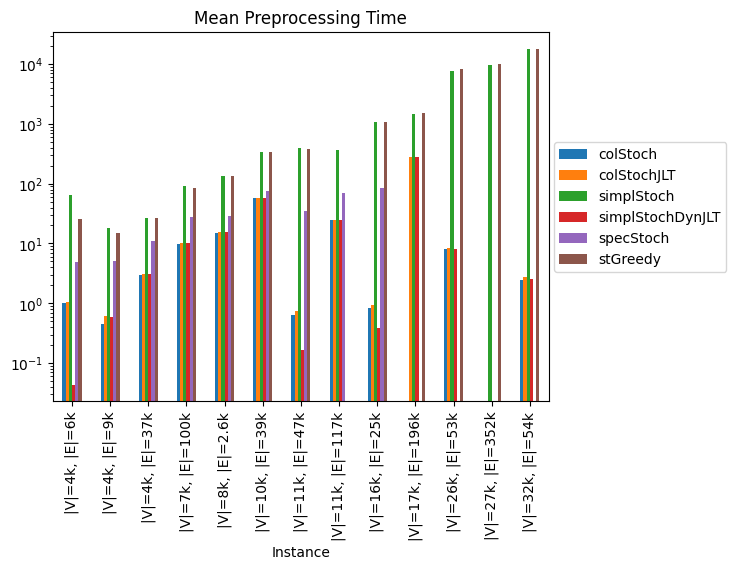

In [111]:
size_ordered = [
    'inf-power',
    'facebook_ego_combined',
    'web-spam',
    'wiki-Vote',
    'p2p-Gnutella09',
    'p2p-Gnutella04',
    'web-indochina-2004',
    'arxiv-heph',
    'web-webbase-2001',
    'arxiv-astro-ph',
    'as-caida20071105',
    'cit-HepTh',
    'ia-email-EU',
]
init_times = results.loc[(results['Revision'] == 'local-opt-fel-solver-copy')]
init_times_plot = init_times.pivot_table(values='InitTime', index='Instance', columns='Experiment').loc[size_ordered].plot(kind='bar', logy=True, title='Mean Preprocessing Time')
init_times_plot.set_xticklabels( ('|V|=4k, |E|=6k',
                                  '|V|=4k, |E|=9k',
                                  '|V|=4k, |E|=37k',
                                  '|V|=7k, |E|=100k',
                                  '|V|=8k, |E|=2.6k',
                                  '|V|=10k, |E|=39k',
                                  '|V|=11k, |E|=47k',
                                  '|V|=11k, |E|=117k',
                                  '|V|=16k, |E|=25k',
                                  '|V|=17k, |E|=196k',
                                  '|V|=26k, |E|=53k',
                                  '|V|=27k, |E|=352k',
                                  '|V|=32k, |E|=54k') )
plt.legend(loc=(1.01,.35))

In [129]:
# add share of preprocessing time to each run
results['Time+InitPart'] = table_focus_fel['Time'] + table_focus_fel['InitTime']/100

In [130]:
# relative speedup and quality compared to stGreedy
def normalize_group(group):
    if 'stGreedy' in group['Experiment'].unique():
        group['Relative Speedup'] = float(group.loc[group['Experiment'] == 'stGreedy']['Time']) / group['Time']
        group['Relative Quality'] = group['Gain'] / float(group.loc[group['Experiment'] == 'stGreedy']['Gain'])
        return group.loc[group['Experiment'] != 'stGreedy'][['Experiment', 'Relative Speedup', 'Relative Quality']]

table_focus_total_resistance = results.loc[(results['Revision'] == 'local-addition-solver-copy') & (results['Experiment'] != 'exhaustive-search')]
normalized_table_focus_total_resistance = table_focus_total_resistance.groupby(['k', 'Instance', 'Focus Node'], group_keys=True).apply(lambda group: normalize_group(group))
normalized_table_focus_total_resistance = normalized_table_focus_total_resistance.reset_index(['k', 'Instance', 'Focus Node'])

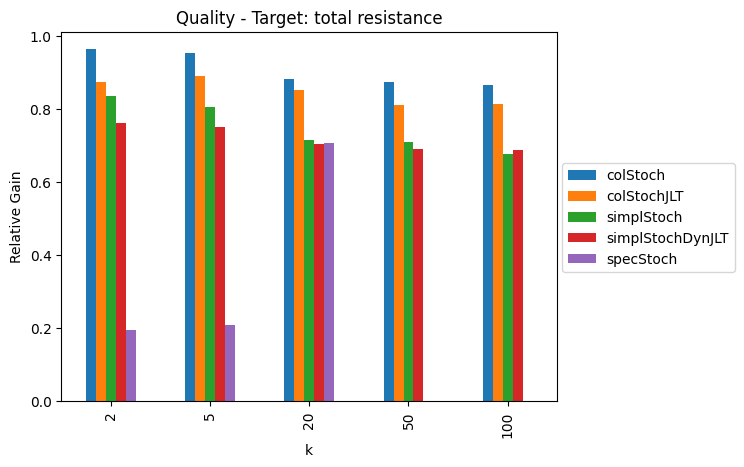

In [131]:
normalized_table_focus_total_resistance.pivot_table(values='Relative Quality', index='k', columns='Experiment').plot(kind='bar', ylabel='Relative Gain', title='Quality - Target: total resistance')
plt.legend(loc=(1.01,.35))

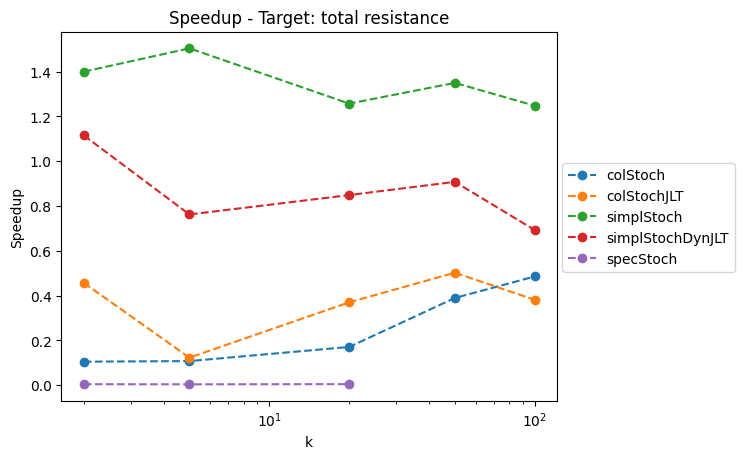

In [132]:
normalized_table_focus_total_resistance.pivot_table(values='Relative Speedup', index='k', columns='Experiment').plot(kind='line', ylabel='Speedup', title='Speedup - Target: total resistance', linestyle='--', marker='o', logx=True)
plt.legend(loc=(1.01,.35))

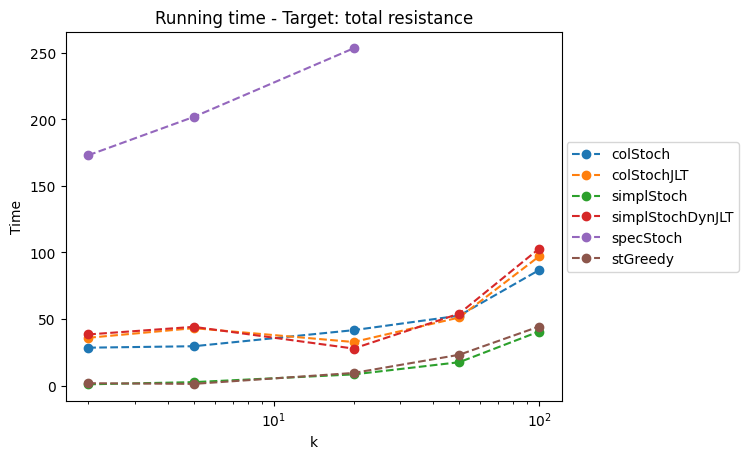

In [133]:
table_focus_total_resistance.pivot_table(values='Time', index='k', columns='Experiment').plot(kind='line', ylabel='Time', title='Running time - Target: total resistance', linestyle='--', marker='o', logx=True)
plt.legend(loc=(1.01,.35))

In [134]:
table_focus_fel = results.loc[(results['Revision'] == 'local-opt-fel-solver-copy') & (results['Experiment'] != 'exhaustive-search')]
normalized_table_focus_fel = table_focus_fel.groupby(['k', 'Instance', 'Focus Node'], group_keys=True).apply(lambda group: normalize_group(group))
normalized_table_focus_fel = normalized_table_focus_fel.reset_index(['k', 'Instance', 'Focus Node'])

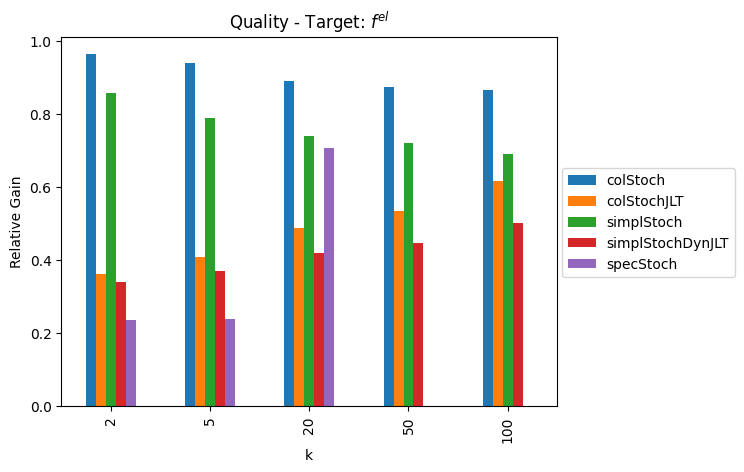

In [135]:
normalized_table_focus_fel.pivot_table(values='Relative Quality', index='k', columns='Experiment').plot(kind='bar', ylabel='Relative Gain', title='Quality - Target: $f^{el}$')
plt.legend(loc=(1.01,.35))

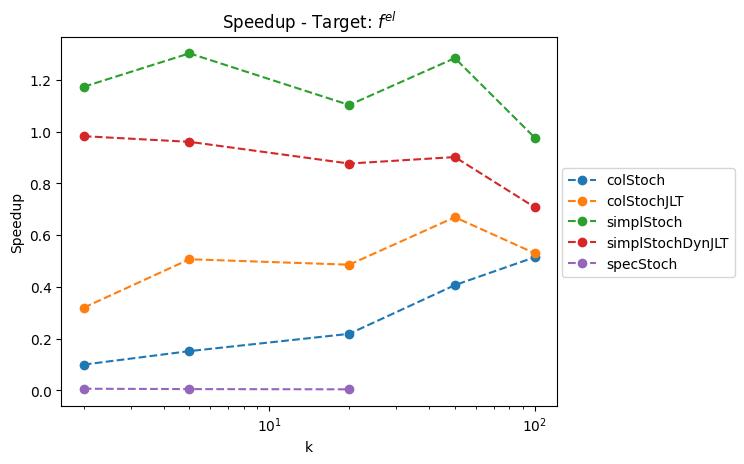

In [136]:
normalized_table_focus_fel.pivot_table(values='Relative Speedup', index='k', columns='Experiment').plot(kind='line', ylabel='Speedup', title='Speedup - Target: $f^{el}$', linestyle='--', marker='o', logx=True)
plt.legend(loc=(1.01,.35))

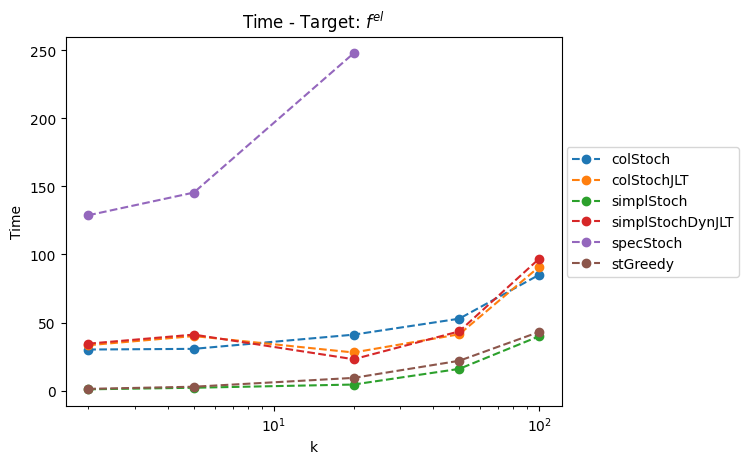

In [137]:
table_focus_fel.pivot_table(values='Time', index='k', columns='Experiment').plot(kind='line', ylabel='Time', title='Time - Target: $f^{el}$', linestyle='--', marker='o', logx=True)
plt.legend(loc=(1.01,.35))

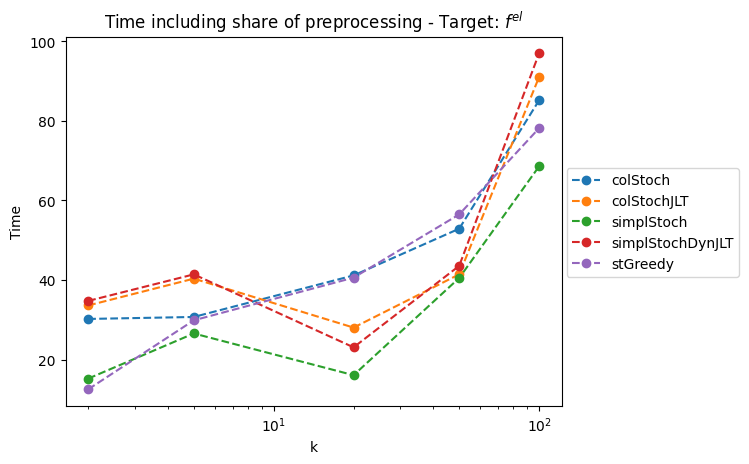

In [145]:
table_focus_fel.loc[table_focus_fel['Experiment'] != 'specStoch'].pivot_table(values='Time+InitPart', index='k', columns='Experiment').plot(kind='line', ylabel='Time', title='Time including share of preprocessing - Target: $f^{el}$', linestyle='--', marker='o', logx=True)
plt.legend(loc=(1.01,.35))

In [96]:
for failed_run in cfg.export_failed_experiments():
    print(failed_run)

('colStoch', ('dense-lu', 'eps2_10', 'eps_0.9', 'focus-100', 'fseed1', 'k-100', 'ust-diag'), 'arxiv-astro-ph', 'timeout')
('colStoch', ('dense-lu', 'eps2_10', 'eps_0.9', 'focus-100', 'fseed1', 'k-100', 'ust-diag'), 'cit-HepTh', 'timeout')
('colStoch', ('dense-lu', 'eps2_10', 'eps_0.9', 'focus-100', 'fseed1', 'k-2', 'ust-diag'), 'arxiv-astro-ph', 'timeout')
('colStoch', ('dense-lu', 'eps2_10', 'eps_0.9', 'focus-100', 'fseed1', 'k-2', 'ust-diag'), 'cit-HepTh', 'timeout')
('colStoch', ('dense-lu', 'eps2_10', 'eps_0.9', 'focus-100', 'fseed1', 'k-20', 'ust-diag'), 'arxiv-astro-ph', 'timeout')
('colStoch', ('dense-lu', 'eps2_10', 'eps_0.9', 'focus-100', 'fseed1', 'k-20', 'ust-diag'), 'cit-HepTh', 'timeout')
('colStoch', ('dense-lu', 'eps2_10', 'eps_0.9', 'focus-100', 'fseed1', 'k-20', 'ust-diag'), 'web-webbase-2001', 'killed')
('colStoch', ('dense-lu', 'eps2_10', 'eps_0.9', 'focus-100', 'fseed1', 'k-5', 'ust-diag'), 'arxiv-astro-ph', 'timeout')
('colStoch', ('dense-lu', 'eps2_10', 'eps_0.9',

In [169]:
def parse_addedEdgeList(el):
    nodes = []
    for node in el:
        if node == el[0]: continue
        nodes.append(node[:-1])
    return nodes

def parse(run, f):
    output = yaml.load(f, Loader=yaml.Loader)
    exp = output['Runs'][0]
    res = []
    # exp['Result'] = [{Focus Node, Value, Gain, Time, Original Value, AddedEdgeList},...]
    for result in exp['Results']:
        single_res = {
            'Experiment': run.experiment.name + 'JLT' if 'Linalg' in exp and 'JLT' in exp['Linalg'] else run.experiment.name,
            'Instance': run.instance.shortname,
            'Revision': run.experiment.revision.name,
            'k': exp['k'],
            'Focus Node': result['Focus Node'] if 'Focus Node' in result else None,
            'AddedEdgeList' : parse_addedEdgeList(result['AddedEdgeList'])
        }
        res.append(single_res)
    return res

cfg = simexpal.config_for_dir()
added_edges_results = []
for successful_run in cfg.collect_successful_results():
    if 'copy' in successful_run.experiment.revision.name:
        with successful_run.open_output_file() as f:
            for res in parse(successful_run, f):
                added_edges_results.append(res)

added_edges_results = pd.DataFrame(added_edges_results)
added_edges_results

,Experiment,Instance,Revision,k,Focus Node,AddedEdgeList
0,colStoch,arxiv-heph,local-addition-solver-copy,100,6,"[3096, 4219, 4271, 5291, 5348, 5491, 6186, 626..."
1,colStoch,arxiv-heph,local-addition-solver-copy,100,149,"[3256, 3512, 4271, 5491, 6038, 6046, 6047, 618..."
2,colStoch,arxiv-heph,local-addition-solver-copy,100,217,"[3256, 3512, 4026, 4271, 5491, 6046, 6190, 658..."
3,colStoch,arxiv-heph,local-addition-solver-copy,100,388,"[3256, 3512, 4269, 4271, 5291, 5491, 6046, 604..."
4,colStoch,arxiv-heph,local-addition-solver-copy,100,804,"[2885, 3096, 3256, 3512, 4025, 4269, 4271, 529..."
...,...,...,...,...,...,...
60495,stGreedy,wiki-Vote,local-opt-fel-solver-copy,50,6540,"[6174, 3519, 4732, 6207, 6291, 6521, 4310, 577..."
60496,stGreedy,wiki-Vote,local-opt-fel-solver-copy,50,6643,"[6177, 3519, 4732, 6207, 6291, 6521, 4310, 577..."
60497,stGreedy,wiki-Vote,local-opt-fel-solver-copy,50,6701,"[6174, 3519, 4732, 6207, 6291, 6521, 4310, 577..."
60498,stGreedy,wiki-Vote,local-opt-fel-solver-copy,50,7022,"[6176, 3519, 4732, 6207, 6291, 6521, 4310, 577..."


In [181]:
added_edges_results.loc[(added_edges_results['Instance'] == 'wiki-Vote') & (added_edges_results['Focus Node'] == 8) &  (added_edges_results['k'] == 5) ]

,Experiment,Instance,Revision,k,Focus Node,AddedEdgeList
4200,colStoch,wiki-Vote,local-addition-solver-copy,5,8,"[3519, 4659, 6142, 6176, 6207]"
9800,colStochJLT,wiki-Vote,local-addition-solver-copy,5,8,"[4732, 5358, 6175, 6176, 6951]"
15300,colStoch,wiki-Vote,local-opt-fel-solver-copy,5,8,"[3519, 4659, 6142, 6176, 6207]"
21000,colStochJLT,wiki-Vote,local-opt-fel-solver-copy,5,8,"[1453, 3256, 3895, 5373, 6175]"
27200,simplStoch,wiki-Vote,local-addition-solver-copy,5,8,"[5551, 1666, 5776, 4731, 6133]"
33100,simplStoch,wiki-Vote,local-opt-fel-solver-copy,5,8,"[5551, 2775, 5776, 4731, 6133]"
38900,simplStochDynJLT,wiki-Vote,local-addition-solver-copy,5,8,"[4204, 7032, 5776, 6454, 6993]"
44600,simplStochDynJLT,wiki-Vote,local-opt-fel-solver-copy,5,8,"[4204, 7032, 5776, 4731, 6993]"
47100,specStoch,wiki-Vote,local-addition-solver-copy,5,8,"[26, 4040, 1484, 1211, 2661]"
48500,specStoch,wiki-Vote,local-opt-fel-solver-copy,5,8,"[26, 4040, 1484, 1211, 2661]"
